Nama  : Siva Ardellia Azzahra  
NIM   : 1306620051  
Kelas : Fisika 2020  

**PENGOLAHAN CITRA DIGITAL**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc, signal
import cv2

In [6]:
#Menampilkan Gambar
image = cv2.imread('image.jpg')
img_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

Text(0.5, 1.0, 'Gray image')

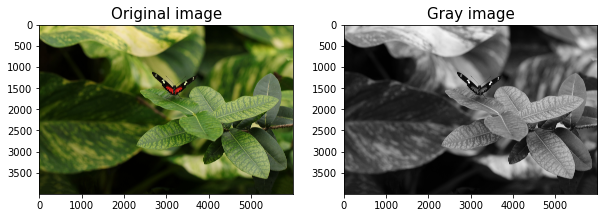

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img_rgb,cmap=plt.cm.gray)
plt.title('Original image',fontsize = 15)

plt.subplot(222)
plt.imshow(img_gray,cmap=plt.cm.gray)
plt.title('Gray image',fontsize = 15)

In [9]:
def rotate90Clockwise(A):
    N = len(A[0])
    for i in range(N // 2):
        for j in range(i, N - i - 1):
            temp = A[i][j]
            A[i][j] = A[N - 1 - j][i]
            A[N - 1 - j][i] = A[N - 1 - i][N - 1 - j]
            A[N - 1 - i][N - 1 - j] = A[j][N - 1 - i]
            A[j][N - 1 - i] = temp
    return A

Text(0.5, 1.0, 'Konvolusi - Korelasi')

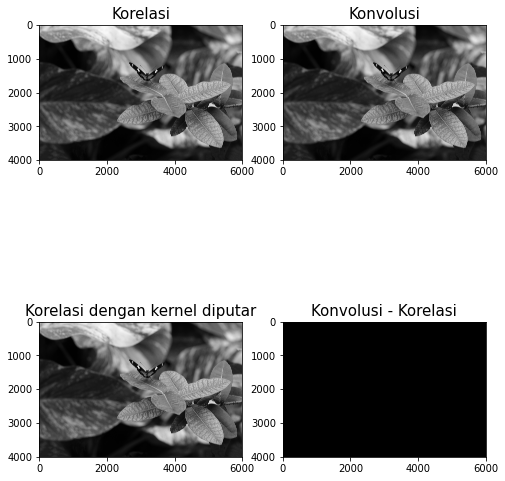

In [12]:
#Kernel
kernel = np.array([[1,-1,2],[1,-2,1],[-1,2,1]])
kernel_rotate90 = rotate90Clockwise(kernel.copy())

#Rotate Kernel
kernel_rotate180 = kernel.copy()
for a in range(2):
    rotate90Clockwise(kernel_rotate180)
kernel_rotate270 = rotate90Clockwise(kernel_rotate180.copy())

#Konvolusi
conv_x = signal.convolve2d(img_gray,kernel)
conv_y = signal.convolve2d(img_gray,kernel_rotate90)
conv = np.sqrt(conv_x*conv_x+conv_y*conv_y)

#Korelasi
corr_x = signal.correlate2d(img_gray,kernel)
corr_y = signal.correlate2d(img_gray,kernel_rotate90)
corr = np.sqrt(corr_x*corr_x+corr_y*corr_y)

#Korelasi diputar
rotate_corr_x = signal.correlate2d(img_gray,kernel_rotate180)
rotate_corr_y = signal.correlate2d(img_gray,kernel_rotate270)
rotate = np.sqrt(rotate_corr_x*rotate_corr_x+rotate_corr_y*rotate_corr_y)

#Konvolusi - Korelasi 
minus = conv-rotate

plt.figure(figsize=(8,10))
plt.subplot(221)
plt.imshow(corr,cmap=plt.cm.gray)
plt.title('Korelasi',fontsize = 15)

plt.subplot(222)
plt.imshow(conv,cmap=plt.cm.gray)
plt.title('Konvolusi',fontsize = 15)

plt.subplot(223)
plt.imshow(rotate,cmap=plt.cm.gray)
plt.title('Korelasi dengan kernel diputar',fontsize = 15)

plt.subplot(224)
plt.imshow(minus,cmap=plt.cm.gray)
plt.title('Konvolusi - Korelasi',fontsize = 15)